
## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
# File location and type
file_location = "/FileStore/tables/iris_dataset-2.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

_c0,_c1,_c2,_c3,_c4
sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [0]:
# Create a view or table

temp_table_name = "iris_dataset-2_csv"

df.createOrReplaceTempView(temp_table_name)

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-1964984066860220>:5
      1 # Create a view or table
      3 temp_table_name = "iris_dataset-2_csv"
----> 5 df.createOrReplaceTempView(temp_table_name)

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.py:412, in DataFrame.createOrReplaceTempView(self, name)
    374 def createOrReplaceTempView(self, name: str) -> None:
    375     """Creates or replaces a local temporary view with this :class:`DataFrame`.
    376 
    377     The lifetime of this tempora

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select * from `iris_dataset-2_csv`

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "iris_dataset-2_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)

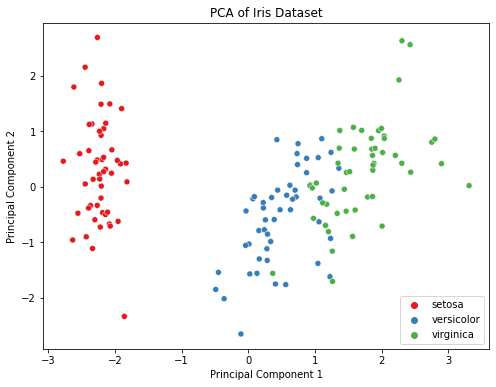

In [0]:
# Import necessary libraries
from pyspark.sql import SparkSession
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Spark session
spark = SparkSession.builder.appName("IrisPCA").getOrCreate()

# Load the dataset using Spark
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/rutikdarda@gmail.com/iris_dataset.csv")

# Convert Spark DataFrame to Pandas DataFrame
iris_df = df1.toPandas()

# Preprocessing: Separate features and target
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Convert features to numeric as they are read as objects
X = X.apply(pd.to_numeric)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert the PCA results to a DataFrame for easier plotting
pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
pca_df = pd.concat([pca_df, y], axis = 1)

# Plotting the PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
